<a href="https://colab.research.google.com/github/JatinSharma222/AI-experiments-Univaersity/blob/main/Experiment13.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Experiment 13
Experimenting with LDA, Factor Analysis, and ICA

In [1]:
# Import required libraries
import pandas as pd
import numpy as np
from sklearn.datasets import load_iris
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.decomposition import FactorAnalysis, FastICA
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns

# Set random seed for reproducibility
np.random.seed(42)

## 1. Load and Explore the Dataset

In [2]:
# Load the dataset
iris = load_iris()
data = pd.DataFrame(data=iris.data, columns=iris.feature_names)
data['target'] = iris.target

# Display the first few rows
data.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


## 2. Preprocess the Data

In [3]:
# Standardize the feature columns
scaler = StandardScaler()
features = data[iris.feature_names]
scaled_features = scaler.fit_transform(features)

# Convert scaled features to a DataFrame
scaled_data = pd.DataFrame(scaled_features, columns=iris.feature_names)
scaled_data['target'] = data['target']
scaled_data.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,-0.900681,1.019004,-1.340227,-1.315444,0
1,-1.143017,-0.131979,-1.340227,-1.315444,0
2,-1.385353,0.328414,-1.397064,-1.315444,0
3,-1.506521,0.098217,-1.283389,-1.315444,0
4,-1.021849,1.249201,-1.340227,-1.315444,0


## 3. Linear Discriminant Analysis (LDA)

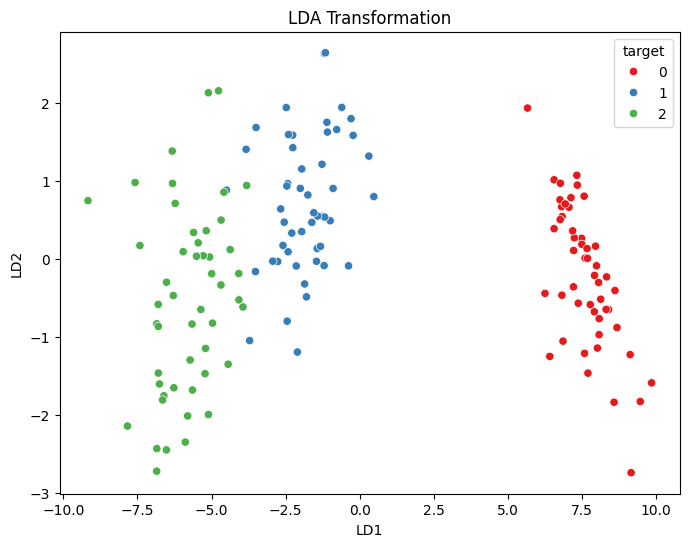

In [4]:
# Apply LDA
lda = LinearDiscriminantAnalysis(n_components=2)
lda_transformed = lda.fit_transform(scaled_features, data['target'])

# Plot the LDA results
plt.figure(figsize=(8, 6))
sns.scatterplot(x=lda_transformed[:, 0], y=lda_transformed[:, 1], hue=data['target'], palette='Set1')
plt.title('LDA Transformation')
plt.xlabel('LD1')
plt.ylabel('LD2')
plt.show()

## 4. Factor Analysis (FA)

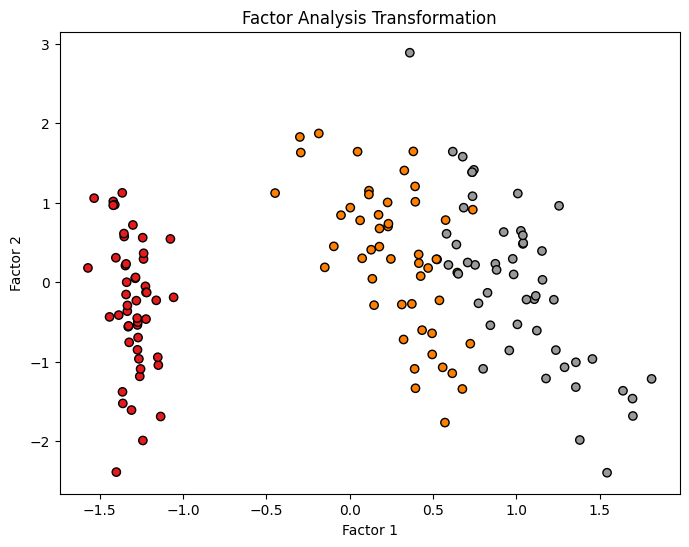

In [5]:
# Apply Factor Analysis
fa = FactorAnalysis(n_components=2, random_state=42)
fa_transformed = fa.fit_transform(scaled_features)

# Plot the Factor Analysis results
plt.figure(figsize=(8, 6))
plt.scatter(fa_transformed[:, 0], fa_transformed[:, 1], c=data['target'], cmap='Set1', edgecolor='k')
plt.title('Factor Analysis Transformation')
plt.xlabel('Factor 1')
plt.ylabel('Factor 2')
plt.show()

## 5. Independent Component Analysis (ICA)

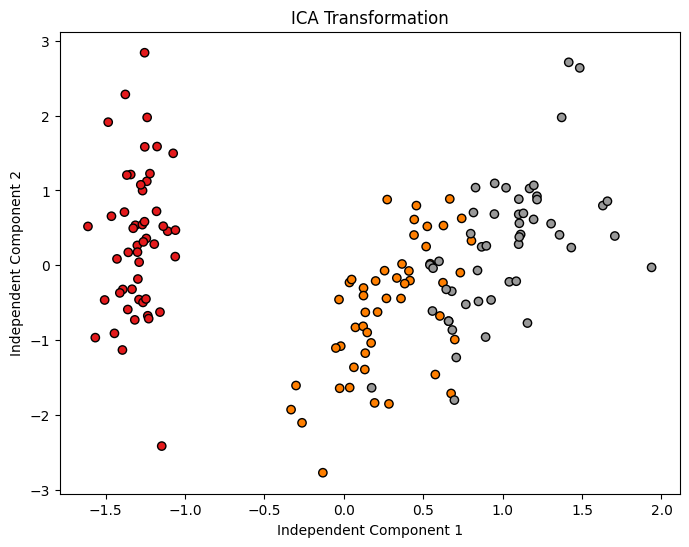

In [6]:
# Apply ICA
ica = FastICA(n_components=2, random_state=42)
ica_transformed = ica.fit_transform(scaled_features)

# Plot the ICA results
plt.figure(figsize=(8, 6))
plt.scatter(ica_transformed[:, 0], ica_transformed[:, 1], c=data['target'], cmap='Set1', edgecolor='k')
plt.title('ICA Transformation')
plt.xlabel('Independent Component 1')
plt.ylabel('Independent Component 2')
plt.show()